## Portfolio Part 2

The goal of the second Portfolio task is to train linear regression models to predict users' ratings towards movies. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will continue using the movielens dataset provided in Portfolio task 1. 

### Import Cleaned MovieLens Dataset
Save the cleaned data (i.e., after removing missing values and outliers) in the Portfolio task 1 as a csv file named 'movielens_data_clean.csv'. You may need to use the Pandas method, i.e., `to_csv`, for doing this. After that, please import the csv file (i.e., 'movielens_data_clean') and print out its total length.

In [1]:
# your code and solution
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

movielens = pd.read_csv("files\movielens_data_clean.csv")

print("The length of data after importing the csv file =", len(movielens))

The length of data after importing the csv file = 96854


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between age/gender/genre/occupation and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, genre and occupation) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [2]:
# your code and solution
# columns present in the current data set
movielens.head(10)

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,22,25.0,M,writer,377,1.0,Children,878887116
2,244,28.0,M,technician,51,2.0,Romance,880606923
3,298,44.0,M,executive,474,4.0,War,884182806
4,253,26.0,F,librarian,465,5.0,Adventure,891628467
5,305,23.0,M,programmer,451,3.0,Romance,886324817
6,6,42.0,M,executive,86,3.0,Drama,883603013
7,62,27.0,F,administrator,257,2.0,Sci-Fi,879372434
8,286,27.0,M,student,1014,5.0,Comedy,879781125
9,200,40.0,M,programmer,222,5.0,Sci-Fi,876042340


In [3]:
# data type of each column
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96854 entries, 0 to 96853
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      96854 non-null  int64  
 1   age         96854 non-null  float64
 2   gender      96854 non-null  object 
 3   occupation  96854 non-null  object 
 4   movieId     96854 non-null  int64  
 5   rating      96854 non-null  float64
 6   genre       96854 non-null  object 
 7   timestamp   96854 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 5.9+ MB


In [4]:
# convert categorical values into numerical values
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype=np.int64)
movielens[["gender","occupation", "genre"]] = enc.fit_transform(movielens[["gender","occupation", "genre"]])
movielens.head(10)

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,1,19,242,3.0,4,881250949
1,22,25.0,1,19,377,1.0,3,878887116
2,244,28.0,1,18,51,2.0,13,880606923
3,298,44.0,1,6,474,4.0,16,884182806
4,253,26.0,0,10,465,5.0,1,891628467
5,305,23.0,1,13,451,3.0,13,886324817
6,6,42.0,1,6,86,3.0,7,883603013
7,62,27.0,0,0,257,2.0,14,879372434
8,286,27.0,1,17,1014,5.0,4,879781125
9,200,40.0,1,13,222,5.0,14,876042340


In [5]:
# data type of each column after OrdinalEncoder feature
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96854 entries, 0 to 96853
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      96854 non-null  int64  
 1   age         96854 non-null  float64
 2   gender      96854 non-null  int64  
 3   occupation  96854 non-null  int64  
 4   movieId     96854 non-null  int64  
 5   rating      96854 non-null  float64
 6   genre       96854 non-null  int64  
 7   timestamp   96854 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 5.9 MB


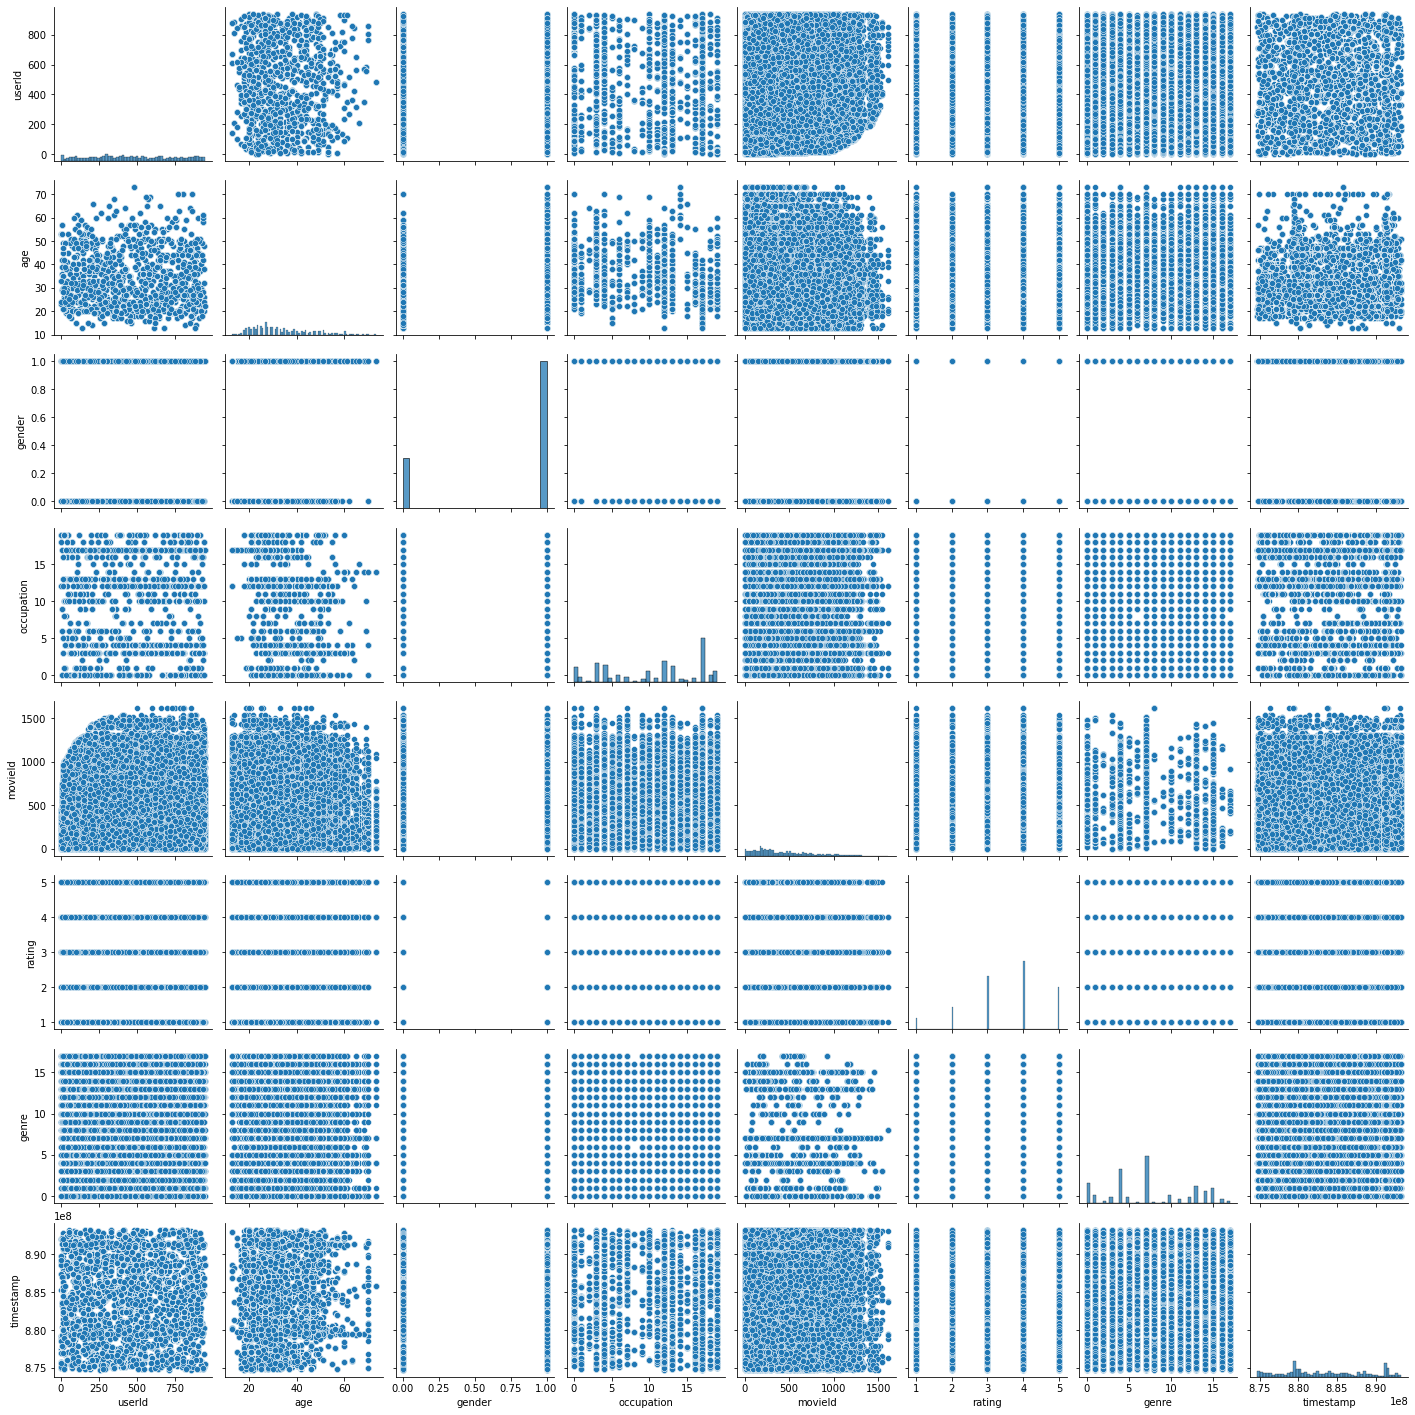

In [6]:
# overall plotting between variables/features
sns.pairplot(movielens)

In [7]:
# finding the correlation between age/gender/genre/occupation and rating
age_to_rating = movielens["age"].corr(movielens["rating"])
gender_to_rating = movielens["gender"].corr(movielens["rating"])
occupation_to_rating = movielens["occupation"].corr(movielens["rating"])
genre_to_rating = movielens["genre"].corr(movielens["rating"])

print("The correlation between age and rating is =", age_to_rating)
print("The correlation between gender and rating is =", gender_to_rating)
print("The correlation between occupation and rating is =", occupation_to_rating)
print("The correlation between genre and rating is =", genre_to_rating)

The correlation between age and rating is = 0.051723646652454894
The correlation between gender and rating is = -0.007238616702177161
The correlation between occupation and rating is = -0.03371705886621186
The correlation between genre and rating is = 0.045249889516191646


## Explanation & Analysis for Correlation Result

According to the correlation test, the least correlated with rating was gender, while the most correlated with rating was age. However, the magnitude between age, occupation, and genre were no much different.

Looking how it correlated with rating, there should be a negative relationship between gender and occupation with rating, since it got a negative correlation result. In the other hand, there was a positive correlation between age and genre with rating, supported by positive correlation result.

Hence, there should be an insignificant relationship between all these variables with rating, since all of the correlation results did not pass 0.5, which was the minimum score needed to be deemed as a significant relationship. This may indicate a poor machine learning prediction will be built, since the features were unable to capture the change of its magnitute to predict the 'rating' feature. 

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [8]:
# your code and solution
from sklearn.model_selection import train_test_split

# Splitting data with case 1
train_case1, test_case1 = train_test_split(movielens, test_size=0.9, random_state=142)
print(train_case1.shape)
print(test_case1.shape)

(9685, 8)
(87169, 8)


In [9]:
# Splitting data with case 2
train_case2, test_case2 = train_test_split(movielens, test_size=0.1, random_state=142)
print(train_case2.shape)
print(test_case2.shape)

(87168, 8)
(9686, 8)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively. 
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [10]:
# your code and solution
from sklearn.linear_model import LinearRegression

# train using model-a
model_a = LinearRegression()
X_train_case1a = train_case1[["age","genre"]]
y_train_case1a = train_case1["rating"]
X_test_case1a = test_case1[["age","genre"]]
y_test_case1a = test_case1["rating"]
model_a.fit(X_train_case1a, y_train_case1a)
print("y = ", model_a.coef_, "* X + ", model_a.intercept_)

# predict the rating using model-a
predict_a = model_a.predict(X_test_case1a)
predict_a

y =  [0.00430778 0.00771507] * X +  3.3493787451963297


array([3.49815537, 3.59523867, 3.5085719 , ..., 3.6650636 , 3.62539311,
       3.49654904])

In [11]:
# train using model-b
model_b = LinearRegression()
X_train_case1b = train_case1[["gender","occupation"]]
y_train_case1b = train_case1["rating"]
X_test_case1b = test_case1[["gender","occupation"]]
y_test_case1b = test_case1["rating"]
model_b.fit(X_train_case1b, y_train_case1b)
print("y = ", model_b.coef_, "* X + ", model_b.intercept_)

# predict the rating using model-b
predict_b = model_b.predict(X_test_case1b)
predict_b

y =  [-0.03358934 -0.00611214] * X +  3.639276967550722


array([3.50178118, 3.5323419 , 3.58735119, ..., 3.52622976, 3.56593124,
       3.52622976])

In [12]:
# train using model-c
model_c = LinearRegression()
X_train_case2c = train_case2[["age","genre"]]
y_train_case2c = train_case2["rating"]
X_test_case2c = test_case2[["age","genre"]]
y_test_case2c = test_case2["rating"]
model_c.fit(X_train_case2c, y_train_case2c)
print("y = ", model_c.coef_, "* X + ", model_c.intercept_)

# predict the rating using model-c
predict_c = model_c.predict(X_test_case2c)
predict_c

y =  [0.00504696 0.01001067] * X +  3.3027927557225865


array([3.48390046, 3.6044447 , 3.49416086, ..., 3.56406906, 3.46396237,
       3.53950022])

In [13]:
# train using model-d
model_d = LinearRegression()
X_train_case2d = train_case2[["gender","occupation"]]
y_train_case2d = train_case2["rating"]
X_test_case2d = test_case2[["gender","occupation"]]
y_test_case2d = test_case2["rating"]
model_d.fit(X_train_case2d, y_train_case2d)
print("y = ", model_d.coef_, "* X + ", model_d.intercept_)

# predict the rating using model-d
predict_d = model_d.predict(X_test_case2d)
predict_d

y =  [-0.0169298  -0.00615977] * X +  3.622008557283404


array([3.5003627 , 3.53116154, 3.58659945, ..., 3.57427992, 3.5172925 ,
       3.51268224])

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [14]:
# your code and solution
from sklearn.metrics import mean_squared_error, r2_score

# evaluate model-a
mse_a = mean_squared_error(y_test_case1a, predict_a)
R2_a = r2_score(y_test_case1a, predict_a)
print("MSE for model-a is:", mse_a)
print("Root MSE for model-a is:", np.sqrt(mse_a))
print("R-squared for model-a is:", R2_a)

MSE for model-a is: 1.241348960988581
Root MSE for model-a is: 1.1141584092886347
R-squared for model-a is: 0.004561331462228035


In [15]:
# evaluate model-b
mse_b = mean_squared_error(y_test_case1b, predict_b)
R2_b = r2_score(y_test_case1b, predict_b)
print("MSE for model-b is:", mse_b)
print("Root MSE for model-b is:", np.sqrt(mse_b))
print("R-squared for model-b is:", R2_b)

MSE for model-b is: 1.2456735046160612
Root MSE for model-b is: 1.116097444050501
R-squared for model-b is: 0.0010934766640541271


In [16]:
# evaluate model-c
mse_c = mean_squared_error(y_test_case2c, predict_c)
R2_c = r2_score(y_test_case2c, predict_c)
print("MSE for model-c is:", mse_c)
print("Root MSE for model-c is:", np.sqrt(mse_c))
print("R-squared for model-c is:", R2_c)

MSE for model-c is: 1.2331306469017946
Root MSE for model-c is: 1.110464158314799
R-squared for model-c is: 0.0029226570453877443


In [17]:
# evaluate model-d
mse_d = mean_squared_error(y_test_case2d, predict_d)
R2_d = r2_score(y_test_case2d, predict_d)
print("MSE for model-d is:", mse_d)
print("Root MSE for model-d is:", np.sqrt(mse_d))
print("R-squared for model-d is:", R2_d)

MSE for model-d is: 1.2357380214091607
Root MSE for model-d is: 1.1116375404821306
R-squared for model-d is: 0.0008144018881390824


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [18]:
# your code and solution
# Put R-squared result in a dataframe
R2 = pd.DataFrame({"R2": [R2_a, R2_b, R2_c, R2_d]},index=["Model-a", "Model-b", "Model-c", "Model-d"])
R2

,R2
Model-a,0.004561
Model-b,0.001093
Model-c,0.002923
Model-d,0.000814


Text(0.5, 1.0, 'R-squared Comparison Between Models')

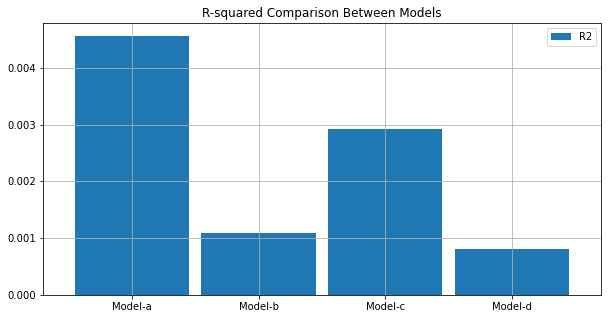

In [19]:
# Generate Bar Chart to compare R-Squared results between models
R2.plot(kind="bar", figsize=(10,5), grid=True, width = 0.9)
plt.xticks(rotation=0)
plt.title("R-squared Comparison Between Models")

## Analysis on R-squared Result

The overall results showed that the R-squared of all models were low, since they were closer to zero. This indicates that all of the machine learning models were poor to predict the rating scored provided by the independent variables used in each model. However, there were several insights that can be drawn. 

Looking back at the bar chart, it showed that Model-a had the best R-squared result compared with other models, followed with Model-c. Both models had two most correlated features as the independent variables in order to predict the dependant variable, which were the 'rating'. However, the difference from each model was the split between train and test data. Model-a used lesser train data to predict the test data output, but in the other hand, Model-c used more train data. Hence, Model-a was able to reduce the variance explained by it, which indicated the data provided were more clustered around the mean. However, it should be noted that a better dataset should need a bigger proportion of train dataset compared with the test dataset, since too less train dataset may lead to overfitting and bias.

As for Model-b and Model-d, they were unsurprisingly performed the worst, since both models used the least correlated features to predict the 'rating'. Hence, splitting the data did not help much to improve the variance explained in the model. 

In [20]:
# put MSE and Root MSE in a dataframe
Evaluation_Score = pd.DataFrame(np.array([[mse_a, np.sqrt(mse_a)], [mse_b, np.sqrt(mse_b)], 
                                         [mse_c, np.sqrt(mse_c)], [mse_d, np.sqrt(mse_d)]]), 
                                 columns=["MSE", "Root_MSE"], 
                                 index=["Model-a", "Model-b", "Model-c", "Model-d"])
Evaluation_Score

,MSE,Root_MSE
Model-a,1.241349,1.114158
Model-b,1.245674,1.116097
Model-c,1.233131,1.110464
Model-d,1.235738,1.111638


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Model-a'),
  Text(1, 0, 'Model-b'),
  Text(2, 0, 'Model-c'),
  Text(3, 0, 'Model-d')])

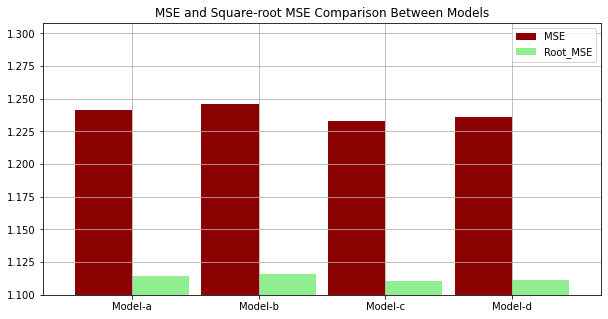

In [21]:
# Generate Bar Chart to compare MSE and Root MSE results between models
Evaluation_Score.plot(kind="bar", figsize=(10,5), color=["darkred", "lightgreen"], grid=True, width = 0.9)
plt.ylim([1.1,None])
plt.title("MSE and Square-root MSE Comparison Between Models")
plt.xticks(rotation=0)

## Analysis on MSE and Root-MSE Results

From above chart, we could see that Model-c had the best MSE and Root-MSE compared with other model, since a machine learning model performed better when MSE and Root-MSE is lower. Surprisingly, Model-a, which also used the same feature but different train and test data proportion, performed worse than Model-d which used least correlated feature with same train and test data proportion with Model-c. 

Looking back to the R-squared result, this provided an insight that higher R-squared score does not necessarily indicates that a model performed better. The spread of train and test data length need to be taken into account, as overfitting of a model due to lesser train data may cause the prediction to be biased. 

## Comparison with Correlation Result Above

Looking back to the correlation result between each independent variable with 'rating', we found out the most correlated features were age and genre, while the least correlated were gender and occupation. From that result, we built each model by considering the most and least correlated feature. For the first scenario, we found out that Model-a and Model-c, which used the most correlated features in its model, performed better than Model-b and Model-d, which used the least correlated feature. This can be assessed from the evaluation score got by each model. This proved that more correlated features will provide a better machine learning model, since it will be able to capture the result due to the change of independent variables better compared with using least correlated features. Hence, it is important to select the features to be put in the machine learning model rather than put random independent variables without any predecent reason.

From explaination above, the only difference between Model-a and Model-c were the proportion of train and test data split which were used to predict 'rating' feature. Model-a used lesser train data compared to Model-c. The interesting part was Model-a had less data variance, but Model-c had lower error when predicting the dependant variable result. This proved that Model-c was able to provide better prediction result compared with Model-a, indicating there was a possible overfitting in Model-a. With this finding, a model with more train data is proven to perform better compared with model with less train data.

In conclusion, it is safe to say that Model-c was the best machine learning model for this case, since it used the most correlated features and had higher train data split in the model, resulting in lower MSE and Root-MSE score. This proved the beginnning statement that model with most correlated feature and and more training data will perform better. Last but not least, it is believed that the original dataset could be improved for its quality in order to have a better evaluation score, since all R-squared results were closer to zero.